In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
print(housing.data.shape)

(20640, 8)


In [15]:
feature_num = 7
boston = housing
X = boston.data[:, :feature_num]
y = boston.target
features = boston.feature_names[:feature_num]
pd.DataFrame(X, columns=features).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85


In [16]:
y[0:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)
ridge_weight = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

different alpha values: [   10   100  1000 10000]


In [19]:
alphas


array([   10,   100,  1000, 10000])

In [20]:
ridge_weight

[array([ 1.00129317,  0.21165794, -0.48735738,  0.44672406,  0.01738434,
        -0.05240239, -0.06218074]),
 array([ 0.97614151,  0.21167665, -0.43599112,  0.39940746,  0.01761859,
        -0.05155397, -0.06591434]),
 array([ 0.83062644,  0.20287339, -0.17987945,  0.16476541,  0.01591126,
        -0.04538656, -0.08336501]),
 array([ 0.48087445,  0.1129021 ,  0.04067542, -0.02514026, -0.00322559,
        -0.02273005, -0.07739392])]

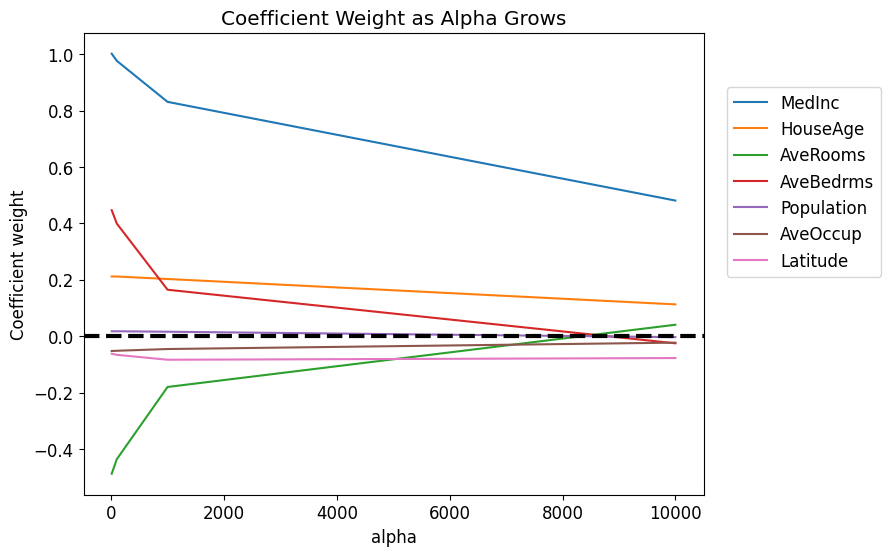

In [24]:
 def weight_versus_alpha_plot(weight, alphas, features):

    fig = plt.figure(figsize = (8, 6))


    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)


    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

 plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
 ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

different alpha values: [0.01, 0.1, 1, 5, 8]


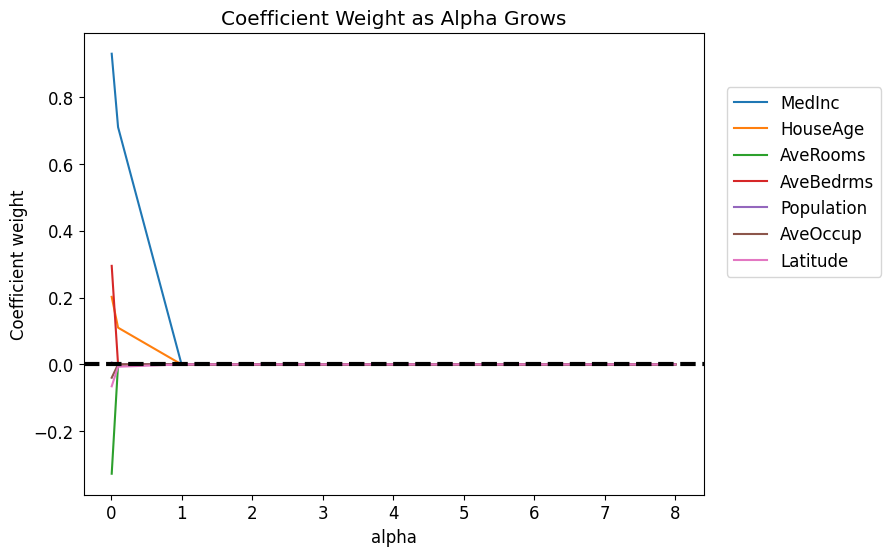

In [41]:
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)
lasso_weight = []
for alpha in alphas:
     lasso = Lasso(alpha = alpha, fit_intercept = True)
     lasso.fit(X_train_std, y_train)
     lasso_weight.append(lasso.coef_)
lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)

In [39]:
def generate_random_data(size, seed):

    rstate = np.random.RandomState(seed)
    X_seed = rstate.normal(0, 1, size)
    X1 = X_seed + rstate.normal(0, .1, size)
    X2 = X_seed + rstate.normal(0, .1, size)
    X3 = X_seed + rstate.normal(0, .1, size)
    y = X1 + X2 + X3 + rstate.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
    return X, y

def pretty_print_linear(estimator, names = None, sort = False):

    coef = estimator.coef_
    if names is None:
        names = ['X%s' % x for x in range(1, len(coef) + 1)]
    info = zip(coef, names)

    if sort:
        info = sorted(info, key = lambda x: -np.abs(x[0]))

    output = ['{} * {}'.format(round(coef, 3), name) for coef, name in info]
    output = ' + '.join(output)
    return output

size = 100
for seed in range(10):
    print('Random seed:', seed)
    X, y = generate_random_data(size, seed)

    lasso = Lasso()
    lasso.fit(X, y)
    print('Lasso model:', pretty_print_linear(lasso))

    ridge = Ridge(alpha = 10)
    ridge.fit(X, y)
    print('Ridge model:', pretty_print_linear(ridge))
    print()

Random seed: 0
Lasso model: 0.486 * X1 + 1.508 * X2 + 0.0 * X3
Ridge model: 0.938 * X1 + 1.059 * X2 + 0.877 * X3

Random seed: 1
Lasso model: 1.034 * X1 + 0.626 * X2 + 0.0 * X3
Ridge model: 0.984 * X1 + 1.068 * X2 + 0.759 * X3

Random seed: 2
Lasso model: 1.361 * X1 + 0.0 * X2 + 0.782 * X3
Ridge model: 0.972 * X1 + 0.943 * X2 + 1.085 * X3

Random seed: 3
Lasso model: 0.0 * X1 + 1.008 * X2 + 1.134 * X3
Ridge model: 0.919 * X1 + 1.005 * X2 + 1.033 * X3

Random seed: 4
Lasso model: 0.27 * X1 + 0.0 * X2 + 1.832 * X3
Ridge model: 0.964 * X1 + 0.982 * X2 + 1.098 * X3

Random seed: 5
Lasso model: 0.0 * X1 + 0.035 * X2 + 1.854 * X3
Ridge model: 0.758 * X1 + 1.011 * X2 + 1.139 * X3

Random seed: 6
Lasso model: 0.486 * X1 + 0.0 * X2 + 1.601 * X3
Ridge model: 1.016 * X1 + 0.89 * X2 + 1.091 * X3

Random seed: 7
Lasso model: 0.441 * X1 + 0.036 * X2 + 1.582 * X3
Ridge model: 1.018 * X1 + 1.039 * X2 + 0.901 * X3

Random seed: 8
Lasso model: 0.28 * X1 + 1.974 * X2 + 0.0 * X3
Ridge model: 0.907 * X1 + 